# Project : InstaBot-2

These are the libraries, which will be used in this project code.

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import warnings
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
s=Service(ChromeDriverManager().install())

I am using chrome browser to open instagram. 

In [8]:
driver = webdriver.Chrome(executable_path = "C:\\Users\\hp\\Data-science-and-machine-learning\\selenium web driver\\chromedriver.exe")
driver.get("https://www.instagram.com")

## Part-1 : Login to Your Instagram Handle & Submit with Sample Username and Password

In [9]:
login = driver.find_element(By.NAME ,"username")
login.send_keys("Aman_2022_sample_testing")
pass_word = driver.find_element(By.NAME ,"password")
pass_word.send_keys("Aman8125@")
bt = driver.find_element(By.XPATH,'//div[contains(@class,"bkEs3")]')
bt.click()
time.sleep(3)

## Save Information

In [10]:
save_info = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"cmbtv")))
save_info.click()

## Notification Window 

In [11]:
notification = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
notification.click()

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### [1.1] From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [12]:
# Search 'food' In Search Box

bt_serch = driver.find_element(By.XPATH,'//input[starts-with(@placeholder,"Search")]')
bt_serch.send_keys("food")
time.sleep(2)

food_list = driver.find_elements(By.XPATH,'//a[starts-with(@class,"oajrlxb2 ")]//div[contains(@class,"_aacl")]/div/div')
top_10_handal = []
count = 0
for i in food_list:
    name = i.get_attribute("innerHTML")
    if "span" not in name:
        top_10_handal.append(name)
        count +=1
    if count ==10:
        break
print(top_10_handal)

['foodtalkindia', 'food_addii', 'foodadda1', 'foodie_from_delhi_', 'kashmirfoodgram', 'gwalior_food_', 'food', 'dilsefoodie', 'bhilaifoood', 'raipurfoodpedia']


In [15]:
# find the followers for top 10 insta handel
d = {}
for i in top_10_handal:
    driver.refresh()
    time.sleep(4)
    bt_serch = driver.find_element(By.XPATH,'//input[starts-with(@placeholder,"Search")]')
    bt_serch.send_keys(i)
    time.sleep(2)

    # click on insta id
    click_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class ="_aa61"]//a[@href= "/' +i+ '/"]')))
    click_btn.click()


    # total no. of followers
    time.sleep(4)
    total_followers = driver.find_elements(By.CLASS_NAME,"_ac2a")[1]
    a = total_followers.get_attribute("title").split(",")
    if len(a) ==2:
        followers_no = int(a[0]+a[1])
    else:
        followers_no = int(a[0])
    d[i] = followers_no
    print(i,followers_no)
    followers_no
    time.sleep(4)

foodtalkindia 308112
food_addii 69753
foodadda1 22696
foodie_from_delhi_ 4719
kashmirfoodgram 89132
gwalior_food_ 251
food 180548
dilsefoodie 1
bhilaifoood 2836
raipurfoodpedia 52522


In [16]:
# find the top 5 followes 

top_5_followers = sorted(d.items(), key=lambda kv:(kv[1], kv[0]),reverse = True)[:5]
for i in range(5):
    print(i+1,"|",top_5_followers[i][0],"|",top_5_followers[i][1])

1 | foodtalkindia | 308112
2 | food | 180548
3 | kashmirfoodgram | 89132
4 | food_addii | 69753
5 | raipurfoodpedia | 52522


## 2. Now Find the number of posts these handles have done in the previous 3 days.

In [17]:
d = {}
for p in top_5_followers:
    driver.refresh()
    time.sleep(4)
    # seach for name-
    bt_serch = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//input[starts-with(@placeholder,"Search")]')))
    bt_serch.send_keys(p[0])
    time.sleep(4)

    # click on instagram handel
    click_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class ="_aa61"]//a[@href= "/' +p[0]+ '/"]')))
    click_btn.click()
    time.sleep(4)
    
    # count total post within 3 days
    count = 0
    i = 0
    post_list = driver.find_element(By.XPATH,'//div[starts-with(@class,"_aabd ")]')
    post_list.click()
    while True:
        time.sleep(4)
        # check the post time 
        post_time = driver.find_element(By.CLASS_NAME,"_aaqe")
        upload_time = post_time.get_attribute("innerHTML").split()
        # check if 3 days are present 
        if len(upload_time) ==3:
            
            if upload_time[1] == "hours" or upload_time[1] =="hour" or upload_time[1] == "minutes" or upload_time[1] == "minute" or upload_time[1] == "seconds":
                count +=1
            elif int(upload_time[0]) <= 3:
                count+=1
            else:
                break
        else:
            break
        # click on next post
        next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
        next_button.click()
        time.sleep(2)
        i+=1
        
    driver.back()
    name = p[0]
    d[name] = count
print(d)

{'foodtalkindia': 3, 'food': 2, 'kashmirfoodgram': 15, 'food_addii': 0, 'raipurfoodpedia': 0}


## 3.Depict this information using a suitable graph.

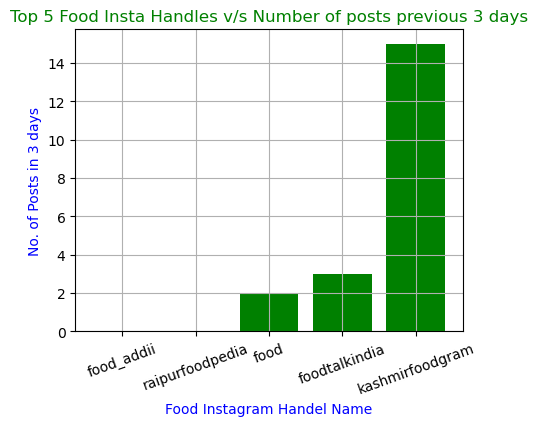

In [18]:
import matplotlib.pyplot as plt
sorted_list = sorted(d.items(), key=lambda kv:(kv[1], kv[0]))
sorted_dict = dict(sorted_list)

# extracte handle name and post
name = sorted_dict.keys()
post_no = sorted_dict.values()

# ploting bar graph for better visualization 
plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='green')
plt.bar(name,post_no,color = 'green')
plt.title('Top 5 Food Insta Handles v/s Number of posts previous 3 days',color = "g")
plt.xlabel("Food Instagram Handel Name",color = "b")
plt.ylabel("No. of Posts in 3 days",color = "b")
plt.grid()
plt.xticks(rotation = 20)
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.

### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [21]:
list_of_total_words = []
for i in top_5_followers:
    # seach for name-
    driver.refresh()
    time.sleep(4)
    a = i[0]
    bt_serch = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//input[starts-with(@placeholder,"Search")]')))
    bt_serch.send_keys(a)
    time.sleep(4)
    
    # click on instagram handel
    click_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class ="_aa61"]//a[@href= "/' +a+ '/"]')))
    click_btn.click()
    time.sleep(4)
    
    # click on 1st post 
    post_list = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH,'//div[starts-with(@class,"_aabd ")]')))
    post_list.click()
        
    count = 1
    while count <=10:
        time.sleep(4)
        post_content = driver.find_element(By.XPATH,'//div[@class="_a9zs"]/span')
        content_list = post_content.text.split()
        list_of_total_words.append(content_list)

        # click on next post 
        next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
        next_button.click()
        count +=1
    driver.back()
    time.sleep(2)

## 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [23]:
# count the frequency of word and hashtag
word_frequency = {}
hashtag_frequency = {}
for i in list_of_total_words:
    for word in i:
        if word.isalpha() == True:
            word_frequency[word] = word_frequency.get(word,0)+1
        elif word[0] == "#":
            hashtag_frequency[word] = hashtag_frequency.get(word,0)+1
            
print(word_frequency)      
print(hashtag_frequency)

{'Little': 2, 'Miss': 2, 'knows': 1, 'up': 6, 'when': 1, 'it': 4, 'comes': 3, 'to': 38, 'spending': 1, 'on': 7, 'food': 6, 'and': 54, 'Comment': 5, 'share': 2, 'which': 1, 'you': 11, 'relate': 1, 'the': 43, 'If': 3, 'looking': 3, 'for': 19, 'fresh': 1, 'healthy': 2, 'Peels': 2, 'Nut': 3, 'Butter': 4, 'is': 21, 'right': 2, 'brand': 2, 'A': 4, 'that': 9, 'all': 3, 'about': 1, 'run': 2, 'by': 4, 'women': 1, 'who': 5, 'hold': 2, 'a': 37, 'passion': 2, 'create': 2, 'simple': 1, 'but': 2, 'in': 21, 'freshest': 2, 'possible': 1, 'Their': 2, 'butters': 1, 'come': 1, 'with': 16, 'several': 1, 'variants': 1, 'like': 1, 'Almond': 2, 'Smooth': 1, 'Coconut': 1, 'so': 3, 'much': 2, 'Its': 1, 'as': 12, 'nutty': 1, 'can': 7, 'Get': 3, 'your': 18, 'toasts': 1, 'ready': 1, 'these': 3, 'nut': 1, 'Place': 3, 'orders': 1, 'from': 11, 'their': 7, 'The': 15, 'iconic': 1, 'Gulati': 1, 'Restaurant': 1, 'at': 12, 'Pandara': 1, 'Road': 3, 'soon': 2, 'opening': 1, 'its': 4, 'first': 1, 'outlet': 3, 'Gurgaon': 1, 

## 3.Create a csv file with two columns : the word and its frequency

In [24]:
# convert word dictionary in to list for data-frame 
word_list = sorted(word_frequency.items(), key=lambda kv:(kv[1], kv[0]))

In [25]:
# use pandas dataframe 
df = pd.DataFrame(word_list, columns=['Word', 'frequency'])
df

,Word,frequency
0,According,1
1,Additional,1
2,Africa,1
3,All,1
4,American,1
...,...,...
830,of,21
831,a,37
832,to,38
833,the,43


In [26]:
# creat a csv file using to_csv
df.to_csv('words_and_frequency.csv', index = False )

## 2.4 Now, find the hashtags that were most popular among these bloggers

In [27]:
# hashtags with frequency is already stored in hashtag_frequency
sorted_hashtags = sorted(hashtag_frequency.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)
sorted_hashtags

[('#foodie', 21),
 ('#foodblogger', 19),
 ('#food', 19),
 ('#foodies', 12),
 ('#yummy', 11),
 ('#instagood', 11),
 ('#instagram', 10),
 ('#instafood', 10),
 ('#fti', 10),
 ('#foodtalkindia', 10),
 ('#foodtalk', 10),
 ('#foodiesofindia', 10),
 ('#foodgram', 10),
 ('#foodgasm', 10),
 ('#foodfeed', 10),
 ('#delicious', 10),
 ('#thrissur', 8),
 ('#kashmirfoodgram', 8),
 ('#foodporn', 8),
 ('#thrissurkaran', 6),
 ('#kochi', 6),
 ('#kerala', 6),
 ('#thrissurfoodies', 5),
 ('#icecream', 5),
 ('#foodpost', 5),
 ('#delhistreetfood', 5),
 ('#streetfood', 4),
 ('#southindianfood', 4),
 ('#raipurfoodpedia', 4),
 ('#kolkatadelites', 4),
 ('#keralagram', 4),
 ('#foodreels', 4),
 ('#foodnews', 4),
 ('#feelkaroreelkaro', 4),
 ('#thrissurinsta', 3),
 ('#reels', 3),
 ('#punjab', 3),
 ('#mohali', 3),
 ('#keralafood', 3),
 ('#junkfood', 3),
 ('#indianfoodbloggers', 3),
 ('#friedchicken', 3),
 ('#foodlove', 3),
 ('#foodhunter', 3),
 ('#foodcollabs', 3),
 ('#fashion', 3),
 ('#delhifoodie', 3),
 ('#chandigar

## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

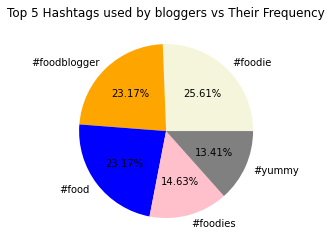

In [28]:
# top 5 hashtags with frequency

top_5_hashtags_list = sorted_hashtags[:5]
top_5_hashtags_dict = dict(top_5_hashtags_list)

hashtag_name = top_5_hashtags_dict.keys()
hashtag_frequency = top_5_hashtags_dict.values()

# plot the pie chart
color = ["beige", "orange", "blue", "pink", "grey"]
plt.pie(hashtag_frequency,labels = hashtag_name, colors = color, autopct = "%.2f%%")
plt.title("Top 5 Hashtags used by bloggers vs Their Frequency")
plt.axis()
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:
### [3.1]  Find out the likes of the top 10 posts of the 5 handles obtained earlier.


In [31]:
d = {}
for i in top_5_followers:
    
    # seach for name-
    driver.refresh()
    time.sleep(4)
    name = i[0]
    bt_serch = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//input[starts-with(@placeholder,"Search")]')))
    bt_serch.send_keys(name)
    time.sleep(4)
    # click on instagram handel
    click_btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class ="_aa61"]//a[@href= "/' +name+ '/"]')))
    click_btn.click()
    time.sleep(4)
    
    # click on 1st post
    post_list = driver.find_element(By.XPATH,'//div[starts-with(@class,"_aabd ")]')
    post_list.click()
    total_like = 0  
    count = 1
    while count <=10:
        time.sleep(4)
        # if number of likes is present 
        try:
            # if number of likes is present 
            post_content = WebDriverWait(driver, 15).until(EC.element_to_be_clickable(driver.find_element(By.XPATH,'//section[starts-with(@class,"_aam_")]/div')))

            # if like more than 999
            try:
                a = post_content.text.split()[0].split(",")
                post_like = int(a[0]+a[1])    
            except IndexError :
                a = post_content.text.split()[0]
                post_like = int(a)
            
            total_like += post_like
            count +=1
            # click on next post 
            next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
            next_button.click()

        #  if number of likes is not present we check next post 
        except ValueError:
            next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
            next_button.click()
        
    d[name] = total_like
    driver.back()
    time.sleep(4)
    

In [32]:
# find the insta handel and no of like
print(d)

{'foodtalkindia': 4045,
 'food': 2176,
 'kashmirfoodgram': 7895,
 'food_addii': 212232,
 'raipurfoodpedia': 15576}

# 3.2 Calculate the average likes for a handle.

In [33]:
# find avgerage like for a insta handle
avg_like = {}
a = 1
for i in d:
    print(a,'|',i,'|',"avg likes-",d[i]/10)
    avg_like[i] = d[i]/10
    a +=1

1 | foodtalkindia | avg likes- 404.5
2 | food | avg likes- 217.6
3 | kashmirfoodgram | avg likes- 789.5
4 | food_addii | avg likes- 21223.2
5 | raipurfoodpedia | avg likes- 1557.6


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [34]:
# like ratio
like_ratio = []
insta_name = []
a = 1
for i in top_5_followers:
    name = i[0]
    followers  = i[1]
    lr = followers/avg_like[name]
    print(a," | ",name, " | ",lr)
    like_ratio.append(lr)
    insta_name.append(name)
    a+=1

1  |  foodtalkindia  |  761.7107540173054
2  |  food  |  829.7242647058823
3  |  kashmirfoodgram  |  112.89677010766307
4  |  food_addii  |  3.2866391496098606
5  |  raipurfoodpedia  |  33.719825372367744


# 3.4 Create a bar graph to depict the above obtained information.

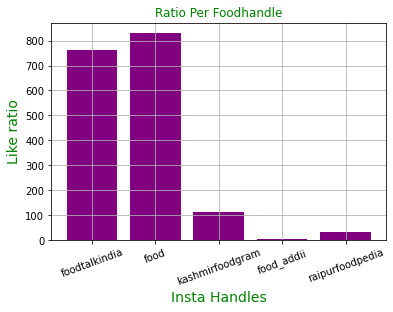

In [35]:
# for creating bar graph

plt.bar(insta_name,like_ratio,color = "purple")
plt.xlabel("Insta Handles",fontsize=14,color = "g")
plt.ylabel("Like ratio",fontsize=14,color = "g")
plt.xticks(rotation = 20)
plt.title("Ratio Per Foodhandle",color = "g")
plt.grid()
plt.show()

In [36]:
# destroying the driver session.

driver.quit()